In [3]:
import os
import torch
from ultralytics import YOLO

def train_yolov11(
		data_yaml,
		weights='yolo11n.pt',
		img_size=640,
		batch_size=16,
		epochs=50,
		device='0'
):
	"""
	Function to train YOLOv11 with a specified dataset.

	Parameters:
	- data_yaml: Path to the data.yaml file (specifying paths to train/val and class info)
	- weights: Path to the pretrained weights (default: yolov11s.pt)
	- img_size: Image size (default: 640)
	- batch_size: Batch size (default: 16)
	- epochs: Number of epochs for training (default: 100)
	- device: Device to run on ('0' for GPU, 'cpu' for CPU)
	"""
	print(f"Starting YOLOv11 training with {epochs} epochs on device {device}")
	model = YOLO(weights).to(device)
	model.train(
		data=data_yaml,
		imgsz=img_size,
		epochs=epochs,
		device=device
	)
	model.save('yolo11n_finetuned.pt')
	print("Training Complete.")

def run_inference(weights_path, source, img_size=640, conf_thresh=0.25, device='0'):
	"""
	Function to run inference using the trained YOLOv11 model.

	Parameters:
	- weights_path: Path to the trained weights
	- source: Directory or image path to run inference on
	- img_size: Image size for inference (default: 640)
	- conf_thresh: Confidence threshold (default: 0.25)
	- device: Device to run on ('0' for GPU, 'cpu' for CPU)
	"""
	print(f"Running inference on images in {source}")
	model = YOLO(weights_path).to(device)
	image_filenames = [filename for filename in os.listdir(source) if filename.endswith(('.jpg', '.jpeg', '.png'))]
	image_paths = [os.path.join(source, filename) for filename in image_filenames]
	results = [model(img_path, imgsz=img_size) for img_path in image_paths]
	print("Inference Complete.")
	return results

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

data_yaml = '/media/eric/D/repos/ANPR-GIA/DatasetYolo/data.yaml'
pretrained_weights = '/media/eric/D/repos/ANPR-GIA/yolo11n.pt'

Using device: cuda


In [4]:
train_yolov11(data_yaml, weights=pretrained_weights, device=device, epochs=50)

Starting YOLOv11 training with 50 epochs on device cuda
New https://pypi.org/project/ultralytics/8.3.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.5 🚀 Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4039MiB)
engine/trainer: task=detect, mode=train, model=/media/eric/D/repos/ANPR-GIA/yolo11n.pt, data=/media/eric/D/repos/ANPR-GIA/DatasetYolo/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, vi

100%|██████████| 5.35M/5.35M [00:00<00:00, 32.2MB/s]


AMP: checks passed ✅


train: Scanning /media/eric/D/repos/ANPR-GIA/DatasetYolo/train/labels... 291 images, 0 backgrounds, 0 corrupt: 100%|██████████| 291/291 [00:00<00:00, 1520.50it/s]


train: New cache created: /media/eric/D/repos/ANPR-GIA/DatasetYolo/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 15, len(boxes) = 291. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


/home/eric/miniconda3/envs/yolo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/home/eric/miniconda3/envs/yolo/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /media/eric/D/repos/ANPR-GIA/DatasetYolo/valid/labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 413.21it/s]

val: New cache created: /media/eric/D/repos/ANPR-GIA/DatasetYolo/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 14. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.64G      1.467      4.038      1.435          5        640: 100%|██████████| 19/19 [00:12<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         14         14    0.00333          1      0.824      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.66G      1.347      2.267      1.188          7        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         14         14    0.00333          1      0.644      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.67G      1.422      2.022      1.219          5        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


                   all         14         14      0.291      0.352      0.358      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.62G      1.347      1.879       1.21          5        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


                   all         14         14      0.741      0.411      0.513       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.67G        1.3       1.67      1.148          8        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


                   all         14         14      0.733      0.857      0.785      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.67G      1.334      1.662       1.18          4        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]

                   all         14         14      0.964        0.5      0.708      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.66G      1.346      1.582      1.223          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         14         14     0.0185      0.143     0.0109    0.00708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.67G      1.289      1.411      1.163          4        640: 100%|██████████| 19/19 [00:11<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         14         14      0.844      0.775      0.829       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.63G      1.306      1.312      1.215          7        640: 100%|██████████| 19/19 [00:10<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         14         14      0.512      0.571      0.613      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.67G      1.253      1.188      1.172          4        640: 100%|██████████| 19/19 [00:11<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         14         14      0.967      0.786       0.95      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.66G      1.232      1.147      1.157          5        640: 100%|██████████| 19/19 [00:11<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]

                   all         14         14      0.792      0.786      0.872      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.67G      1.313      1.173       1.21          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         14         14       0.85      0.857      0.903      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.63G      1.239      1.092      1.165          4        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         14         14       0.93          1      0.972      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.67G      1.182      1.009      1.138          4        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         14         14       0.99      0.929      0.986      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.66G      1.175     0.9289      1.097          2        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         14         14      0.858          1      0.944      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.67G      1.192     0.9117      1.121          7        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]

                   all         14         14      0.933       0.99      0.957      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.63G        1.2      0.879       1.13          6        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all         14         14      0.982      0.929      0.986      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.67G      1.195     0.8869      1.137          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         14         14      0.919      0.929      0.936      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.66G       1.19     0.8305      1.126          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         14         14      0.984          1      0.995      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.67G      1.114     0.7987      1.083          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         14         14      0.966      0.929      0.966      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.63G       1.14      0.774      1.101          6        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         14         14      0.985      0.929      0.945      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.67G       1.13     0.7592      1.096          5        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         14         14      0.916      0.857      0.906      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.66G      1.136     0.7883      1.109          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         14         14      0.873      0.982      0.906      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.67G      1.078     0.7701      1.097          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all         14         14      0.933      0.995      0.957      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.63G      1.074     0.7228      1.055          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         14         14      0.929          1       0.99      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.67G      1.083     0.7355      1.087          4        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.93it/s]

                   all         14         14      0.923      0.929      0.952       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.66G      1.094     0.7582      1.093          4        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         14         14      0.972      0.929      0.979      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.67G      1.068     0.7123      1.045          5        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         14         14      0.924      0.929      0.983      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.63G      1.067     0.6874      1.045          6        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all         14         14          1      0.927      0.956       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.67G      1.039     0.6596      1.034          5        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         14         14      0.914      0.929      0.925       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.66G      1.062     0.7167      1.063          5        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         14         14       0.98      0.857      0.967      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.67G      1.029     0.6468      1.046          2        640: 100%|██████████| 19/19 [00:11<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         14         14      0.931       0.96       0.99      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.63G      1.035     0.6498      1.059          5        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


                   all         14         14      0.867          1      0.981      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.67G      1.009     0.6341      1.026          4        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         14         14      0.925      0.929      0.968      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.66G     0.9896      0.604      1.031          4        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         14         14      0.933      0.989      0.986      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.67G     0.9432     0.5912      1.012          7        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]

                   all         14         14      0.989      0.929      0.979      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.63G     0.9368     0.5957      1.008          1        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


                   all         14         14      0.988      0.929       0.97       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.67G     0.9676     0.5918      1.019          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         14         14      0.931          1      0.986      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.66G     0.9643     0.5769      1.004          6        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         14         14      0.956          1      0.995      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.67G     0.9321     0.5733      1.012          4        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]

                   all         14         14       0.99      0.929      0.974      0.714


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.63G     0.9003     0.5338      1.015          3        640: 100%|██████████| 19/19 [00:12<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         14         14      0.923      0.929      0.972      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.67G     0.8843     0.5268     0.9934          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         14         14      0.928      0.921      0.974      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.66G     0.9027     0.5322      1.001          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.61it/s]


                   all         14         14      0.928      0.927      0.969      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.67G     0.8843     0.5132      1.004          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         14         14      0.929      0.928      0.938        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.63G      0.861     0.5053     0.9752          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.80it/s]

                   all         14         14      0.928      0.925      0.957      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.67G     0.8307     0.4895     0.9678          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         14         14      0.926          1      0.986      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.66G     0.8422     0.4828     0.9815          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         14         14      0.927          1      0.986       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.67G     0.7858      0.471     0.9766          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         14         14      0.928          1      0.986      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.63G     0.7931     0.4679     0.9618          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         14         14      0.922          1      0.986       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.67G      0.838     0.4877     0.9699          3        640: 100%|██████████| 19/19 [00:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all         14         14       0.92          1      0.986      0.758



50 epochs completed in 0.170 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4039MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all         14         14      0.957          1      0.995      0.771
Speed: 0.3ms preprocess, 8.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2
Training Complete.


In [5]:
test_images_dir = "/media/eric/D/repos/ANPR-GIA/DatasetYolo/test/images"
results = run_inference('yolo11n_finetuned.pt', test_images_dir, device=device)

Running inference on images in /media/eric/D/repos/ANPR-GIA/DatasetYolo/test/images

image 1/1 /media/eric/D/repos/ANPR-GIA/DatasetYolo/test/images/4373KYG_jpg.rf.7ad25abb634e9460a372bb0abfc08833.jpg: 640x640 1 License Plate, 11.7ms
Speed: 2.4ms preprocess, 11.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /media/eric/D/repos/ANPR-GIA/DatasetYolo/test/images/0550HNN_jpg.rf.79fa3912c92496ee635323f4eb29276c.jpg: 640x640 1 License Plate, 11.1ms
Speed: 2.4ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /media/eric/D/repos/ANPR-GIA/DatasetYolo/test/images/1062FNT_jpg.rf.e25368be438c8a1674da49f87b0195a6.jpg: 640x640 1 License Plate, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /media/eric/D/repos/ANPR-GIA/DatasetYolo/test/images/1111LRB_jpg.rf.9408c5a550f980ad9d44e3845a0bdcf4.jpg: 640x640 1 License Plate, 11.1ms
Speed: 2.2ms preprocess, 11.1

In [6]:
results[0][0].boxes.xyxy[0].cpu().numpy().astype(int).tolist()

[250, 269, 360, 337]

In [18]:
import cv2
import matplotlib.pyplot as plt
import math

# Determine the number of rows and columns for the subplot grid
num_images = len(results)
cols = 3  # Number of columns (adjust as needed)
rows = math.ceil(num_images / cols)  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop over the images and display them in subplots
for idx, result in enumerate(results):
	result = result[0]
	img = result.orig_img
	box = result.boxes.xyxy[0].cpu().numpy().astype(int).tolist()
	if img is not None:
		img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

		# Draw the bounding box on the image
		x1, y1, x2, y2 = box
		cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

		# Display the image in the subplot
		axes[idx].imshow(img)
		axes[idx].axis('off')  # Hide the axis
	else:
		print("Could not load image")

# Remove any unused subplots
for i in range(num_images, len(axes)):
	fig.delaxes(axes[i])
	print(f"Deleted subplot {i}")

# Display the grid of images
plt.tight_layout()
plt.show()

Deleted subplot 28
Deleted subplot 29


<Figure size 1500x1500 with 28 Axes>

In [3]:
from PIL import Image
import cv2

example_img = cv2.imread('../images/diverse/Copia de 1727095338102.jpg')
example_img = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB)
example_img = Image.fromarray(example_img)
lst = [example_img]*3
model = YOLO('../yolo11n_finetuned.pt')

In [4]:
results = model("../images/reduced", imgsz=640, verbose=False)

In [45]:
box = results[0][0].boxes.xyxy[0].cpu().numpy().astype(int).tolist()
box

[1237, 1200, 2557, 1568]

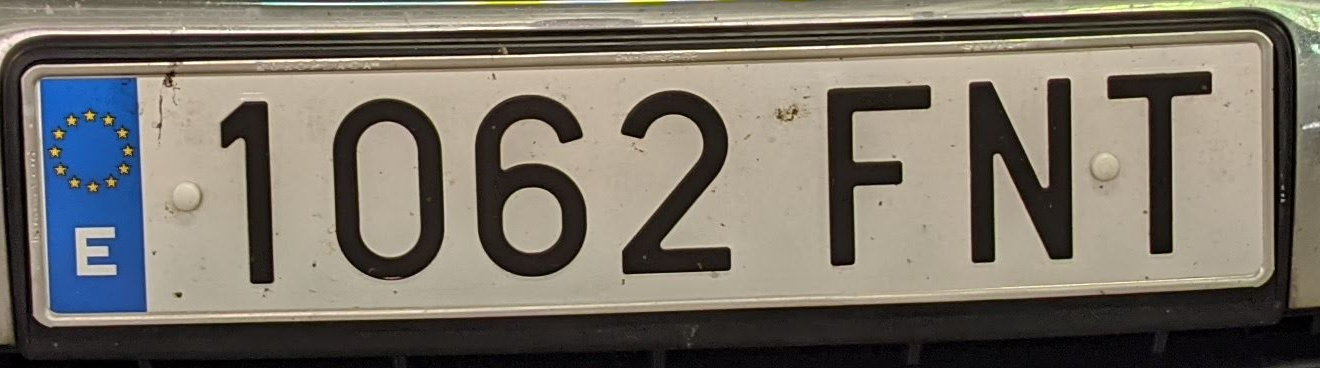

In [49]:
crop = Image.fromarray(results[0].orig_img[:,:,::-1]).crop(box)
crop